In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
nz, nx, ny = 63, 189, 170
nc = nx*ny*nz
nfx = (nx-1)*ny*nz
nfy = (ny-1)*nx*nz
nfz = (nz-1)*ny*nx

litho = np.loadtxt("litho_code.mod").reshape((nz, nx, ny), order='F')

# wdat = np.loadtxt("w.dat")
# ws = wdat[:nc]
# wx = wdat[nc:nc+nfx]
# wy = wdat[nc+nfx:nc+nfx+nfy]
# wz = wdat[nc+nfx+nfy:]

In [63]:
# Find fx interface
face_idx = litho[:,1:,:]
idx = np.abs(litho[:,:-1,:] - litho[:,1:,:]) == 1

face_idy = litho[:,:,1:]
idy = np.abs(litho[:,:,:-1] - litho[:,:,1:]) == 1

face_idz = litho[1:,:,:]
idz = np.abs(litho[:-1,:,:] - litho[1:,:,:]) == 1

wx = np.ones_like(face_idx)
wx[face_idx==1] = 5
surface_wx = np.ones_like(face_idx)
surface_wx[0,:,:] = 16
surface_wx[1,:,:] = 8
surface_wx[2,:,:] = 4
surface_wx[3,:,:] = 2

wy = np.ones_like(face_idy)
wy[face_idy==1] = 5
surface_wy = np.ones_like(face_idy)
surface_wy[0,:,:] = 16
surface_wy[1,:,:] = 8
surface_wy[2,:,:] = 4
surface_wy[3,:,:] = 2

wz = np.ones_like(face_idz)
wz[face_idz==2] = 3
surface_wz = np.ones_like(face_idz)

ws = np.ones(nc)
wx = np.max(np.c_[wx.T.ravel(), surface_wx.T.ravel()], axis=1)
wy = np.max(np.c_[wy.T.ravel(), surface_wy.T.ravel()], axis=1)
wz = np.max(np.c_[wz.T.ravel(), surface_wz.T.ravel()], axis=1)

wx[idx.T.ravel()] = 0.01
wy[idy.T.ravel()] = 0.01
wz[idz.T.ravel()] = 0.01

np.savetxt("NewWeights.dat", np.r_[ws,wx,wy,wz], fmt="%.2f")


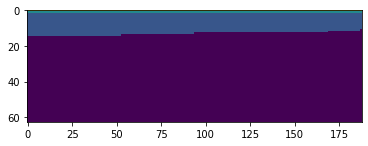

In [58]:
plt.subplot()

plt.imshow(wx.reshape((nz, nx-1, ny), order='F')[:,:,0])


In [56]:
wx = np.max(np.c_[wx.T.ravel(), surface_wx.T.ravel()], axis=1)


In [64]:
wx.min()




0.01